In [9]:
# Importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load & Explore Data
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

C:\Users\Mohamed Emad\AppData\Local\Temp\ipykernel_9884\1165914937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=data, palette='Set2')


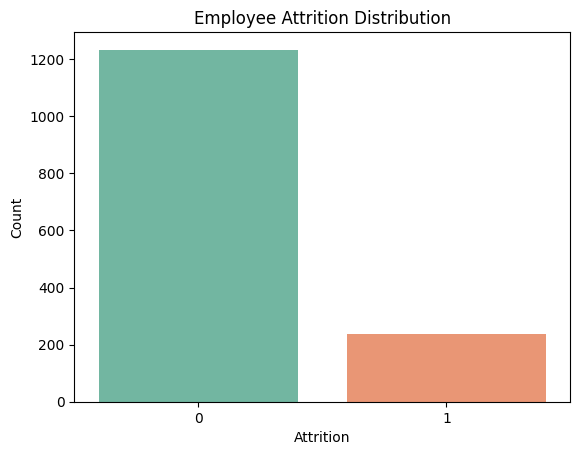

In [19]:
# Visualization
sns.countplot(x='Attrition', data=data, palette='Set2')
plt.title('Employee Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

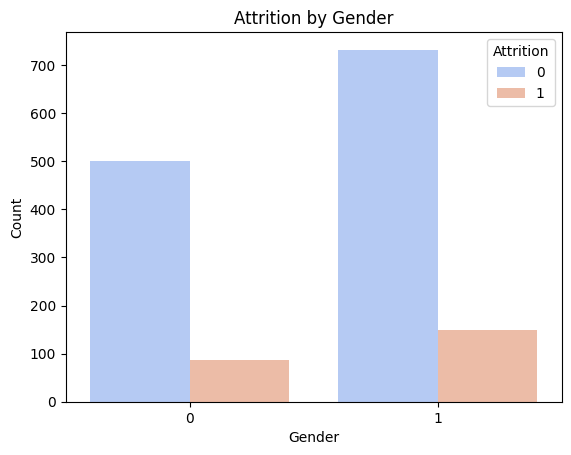

In [20]:
sns.countplot(x='Gender', hue='Attrition', data=data, palette='coolwarm')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


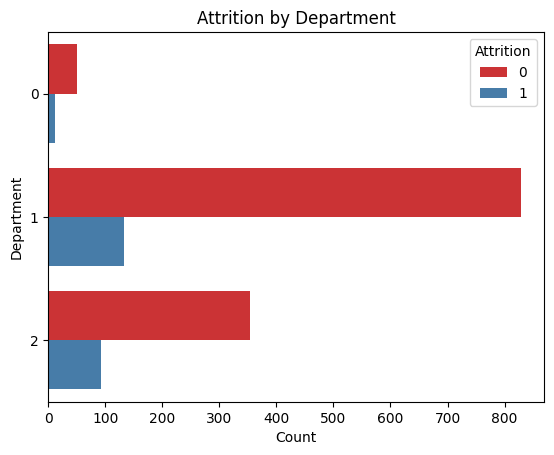

In [21]:
sns.countplot(y='Department', hue='Attrition', data=data, palette='Set1')
plt.title('Attrition by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()


C:\Users\Mohamed Emad\AppData\Local\Temp\ipykernel_9884\1492374379.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette='Accent')


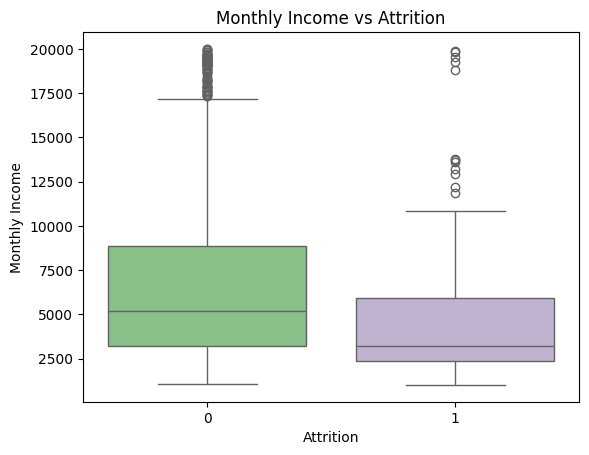

In [22]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette='Accent')
plt.title('Monthly Income vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


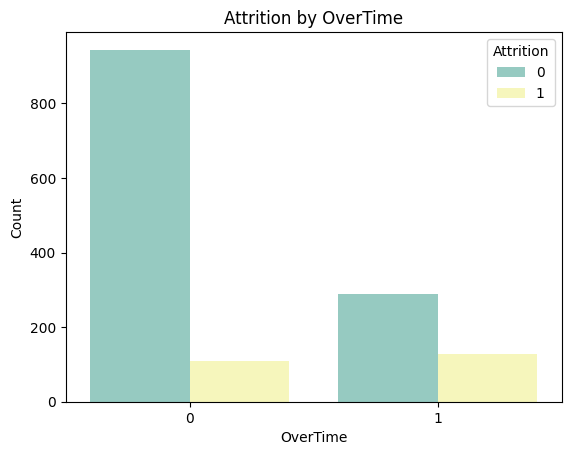

In [23]:
sns.countplot(x='OverTime', hue='Attrition', data=data, palette='Set3')
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.show()


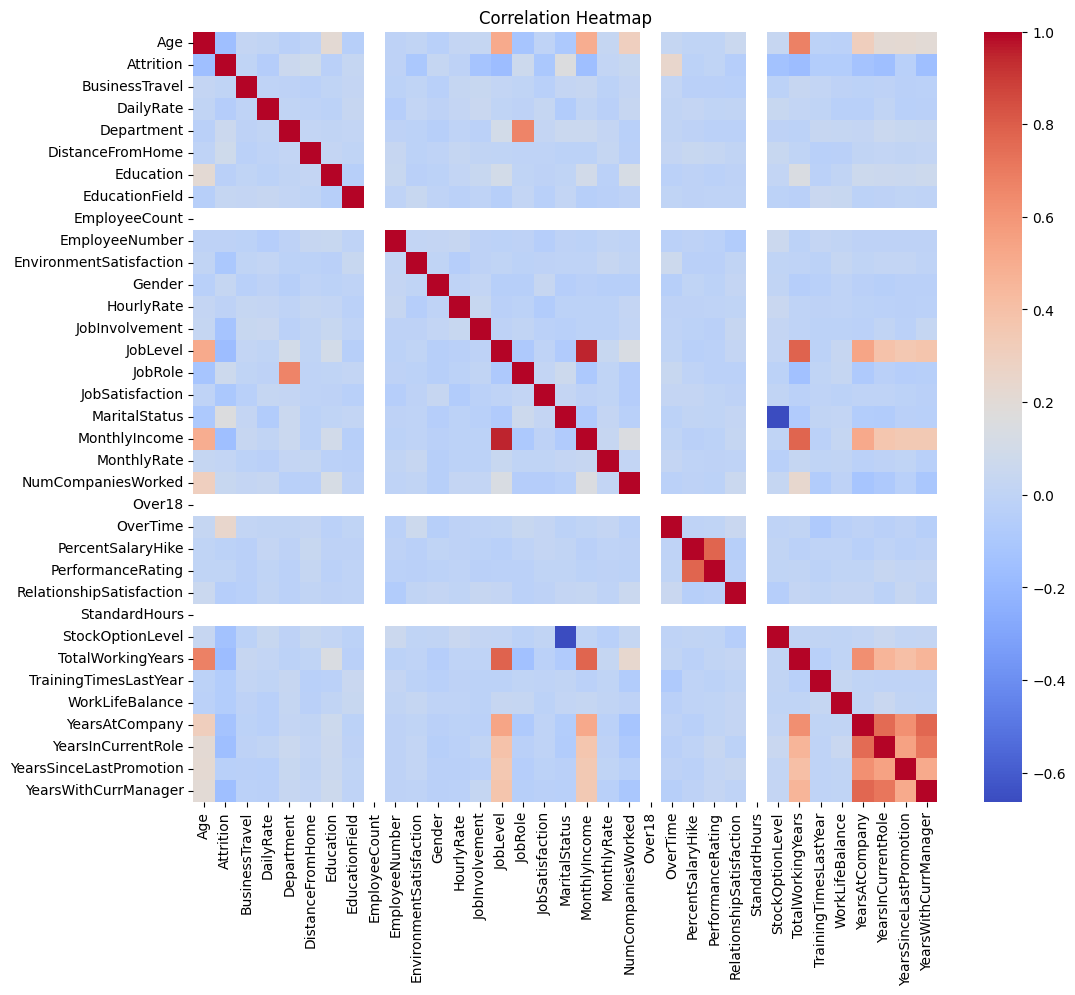

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


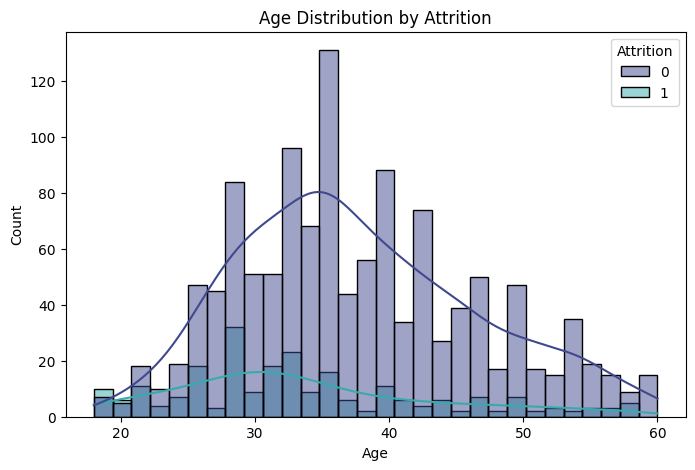

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='Age', hue='Attrition', bins=30, kde=True, palette='mako')
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


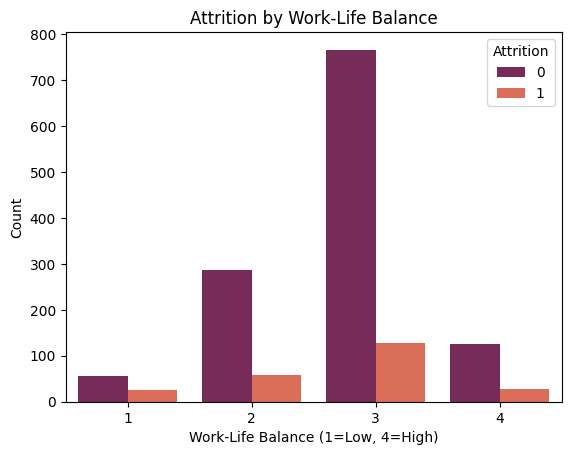

In [26]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data, palette='rocket')
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance (1=Low, 4=High)')
plt.ylabel('Count')
plt.show()


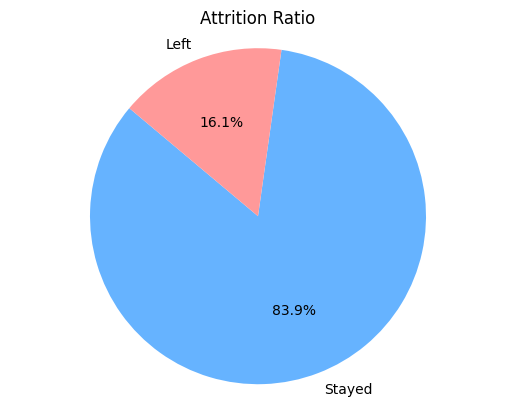

In [27]:
labels = ['Stayed', 'Left']
sizes = data['Attrition'].value_counts(normalize=True).values
colors = ['#66b3ff','#ff9999']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')
plt.title('Attrition Ratio')
plt.show()


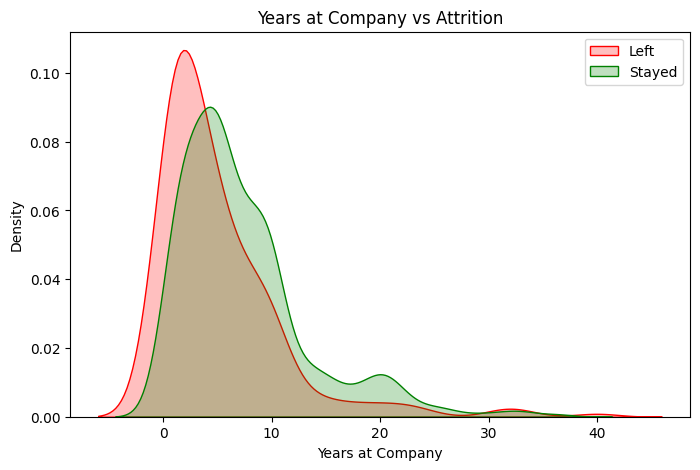

In [28]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=data[data['Attrition'] == 1], x='YearsAtCompany', label='Left', fill=True, color='red')
sns.kdeplot(data=data[data['Attrition'] == 0], x='YearsAtCompany', label='Stayed', fill=True, color='green')
plt.title('Years at Company vs Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Density')
plt.legend()
plt.show()


In [10]:
# Encoding
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [11]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8639455782312925

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.44      0.10      0.17        39

    accuracy                           0.86       294
   macro avg       0.66      0.54      0.55       294
weighted avg       0.82      0.86      0.83       294


Confusion Matrix:
 [[250   5]
 [ 35   4]]


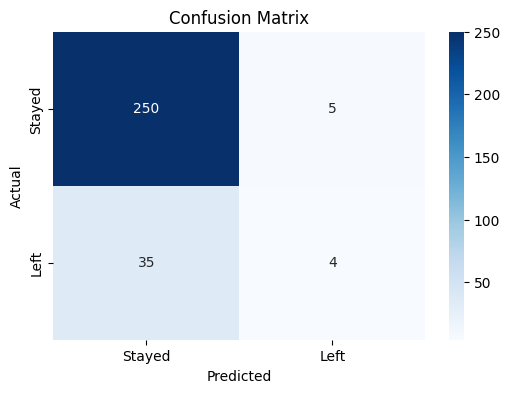

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\Mohamed Emad\AppData\Local\Temp\ipykernel_9884\2034457133.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=comparison, palette='pastel')


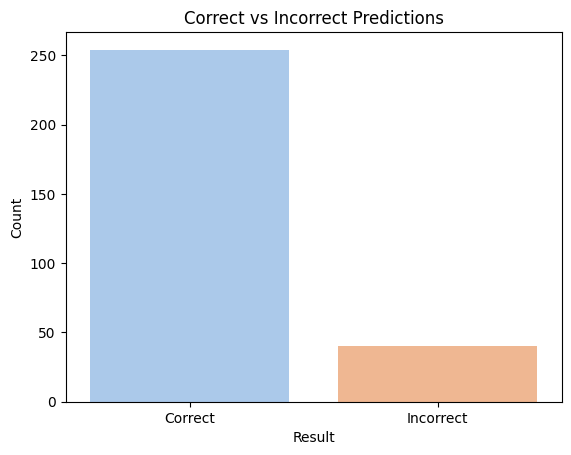

In [31]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison['Result'] = np.where(comparison['Actual'] == comparison['Predicted'], 'Correct', 'Incorrect')

sns.countplot(x='Result', data=comparison, palette='pastel')
plt.title('Correct vs Incorrect Predictions')
plt.ylabel('Count')
plt.show()

In [16]:
importances = model.feature_importances_
feature_names = X.columns

C:\Users\Mohamed Emad\AppData\Local\Temp\ipykernel_9884\1795671237.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


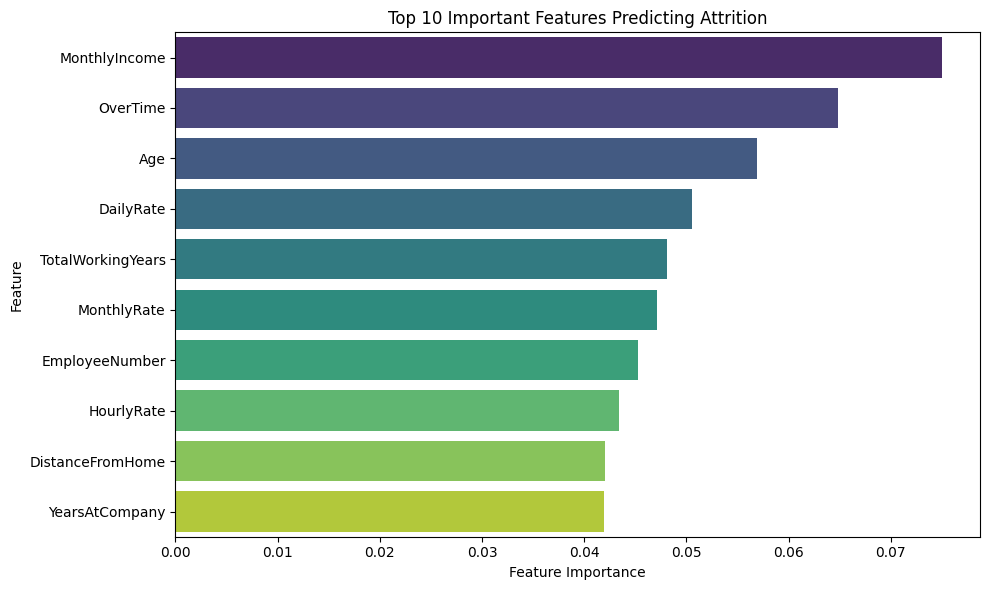

In [18]:
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 10 Important Features Predicting Attrition')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()